In [136]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scipy Libraries
from scipy.io import arff
from scipy.io.arff import loadarff

# Sklearn Libraries
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import (accuracy_score, auc, confusion_matrix, f1_score, precision_score,
                            recall_score, roc_auc_score, roc_curve)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Boosting Libraries
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# TensorFlow and Keras Libraries
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import (Activation, BatchNormalization, Conv1D, Dense, Dropout, Flatten, 
                                    GlobalAveragePooling1D, GlobalMaxPooling1D, LeakyReLU, MaxPooling1D, 
                                    ReLU)
from tensorflow.keras.activations import swish
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Plotting settings
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # minus 표시

# # 행 표시
# pd.set_option('display.max_rows', 10)
# pd.set_option('display.max_columns', 10)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [137]:
import os
import librosa.display
import scipy.io as sio
import scipy.io.wavfile
import sounddevice as sd
from pathlib import Path
from matplotlib import font_manager, rc
import warnings
warnings.filterwarnings('ignore')


In [138]:
data_dir = '/Users/park/play/data/audio/'
folder_names = os.listdir(data_dir)
folder_names

['.DS_Store', 'normal', 'abnorm']

In [139]:
import glob

abnorm_files = glob.glob('/Users/park/play/data/audio/abnorm/*.wav')
normal_files = glob.glob('/Users/park/play/data/audio/normal/*.wav')
all_files = abnorm_files + normal_files
print(len(abnorm_files))
print(len(normal_files))
print(len(all_files))
abnorm_files[0]

293
55
348


'/Users/park/play/data/audio/abnorm/abnorm_278.wav'

In [140]:
sample_rate, data = sio.wavfile.read(abnorm_files[0])
sample_rate
data.shape

(587536, 2)

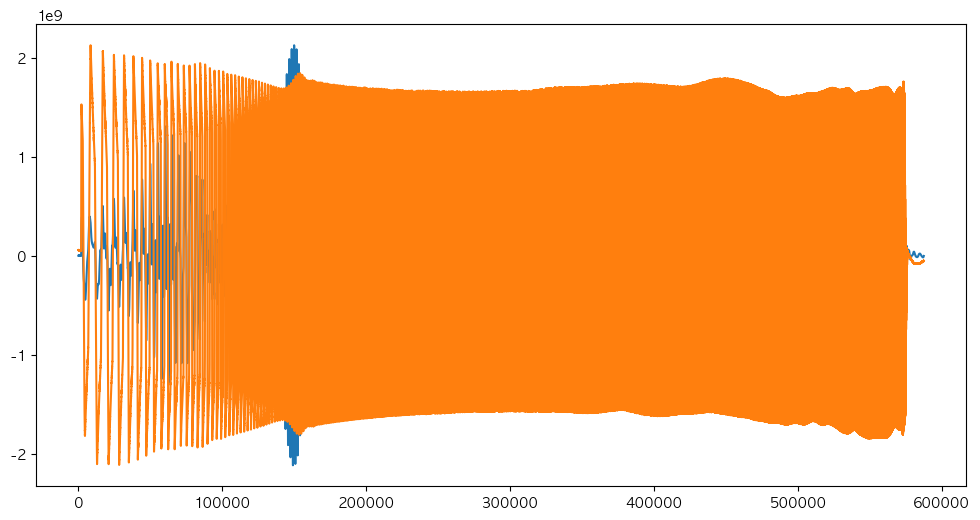

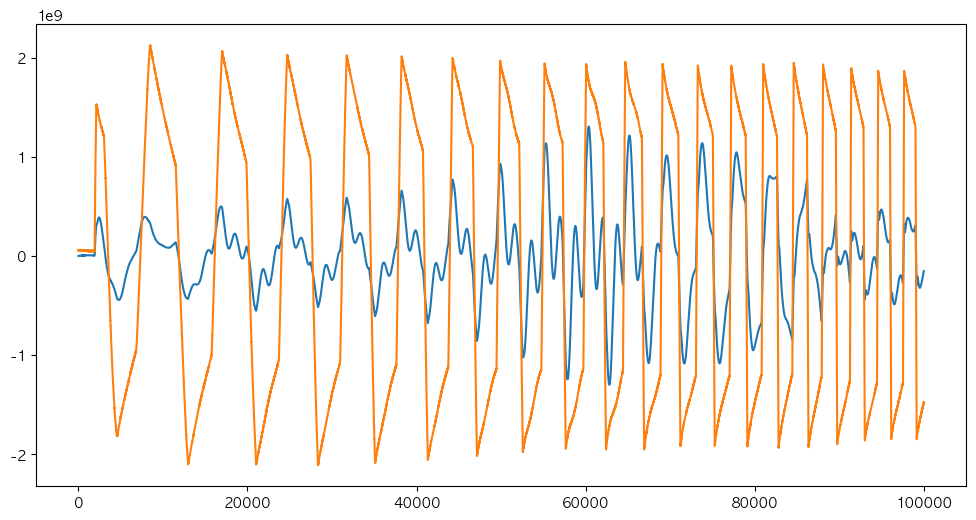

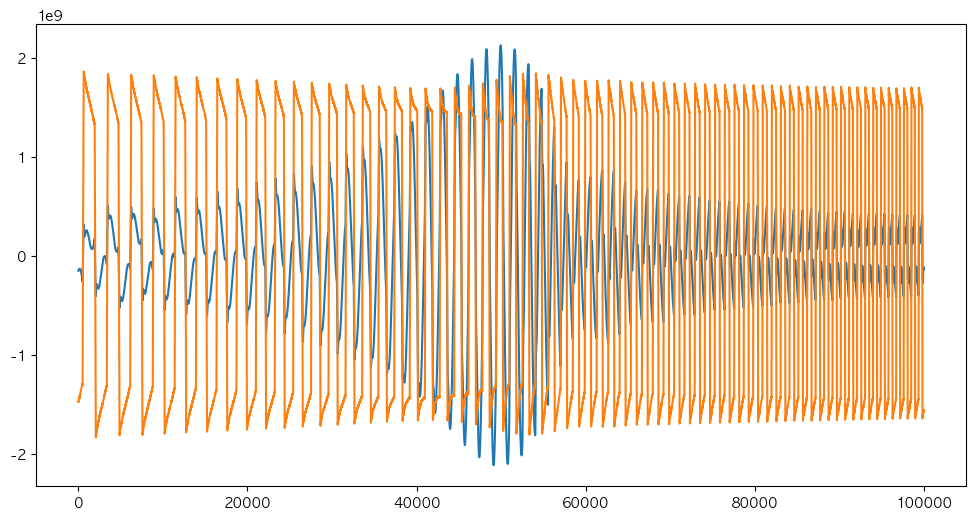

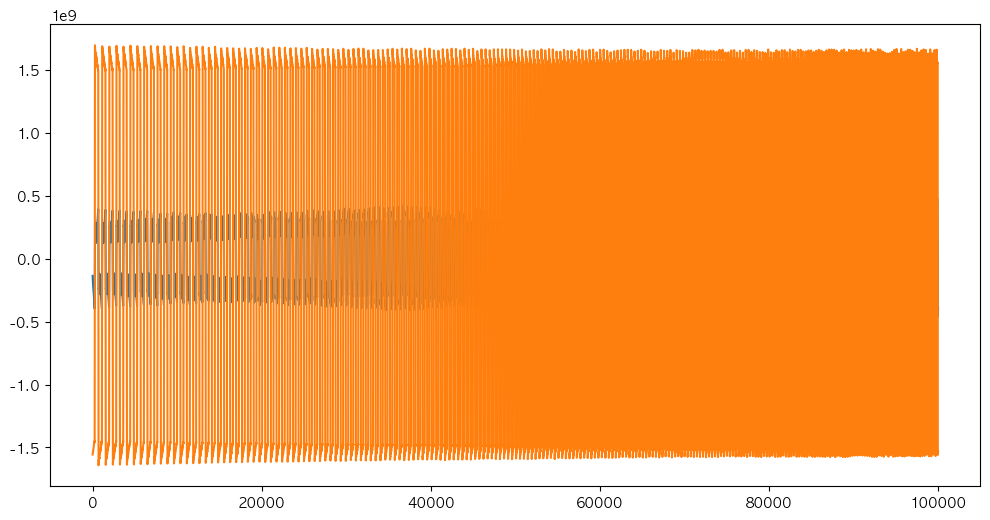

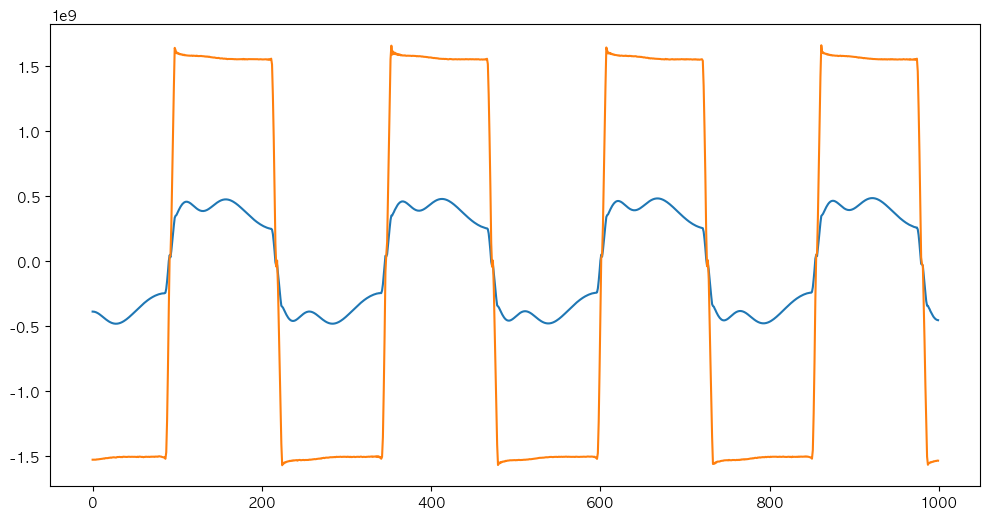

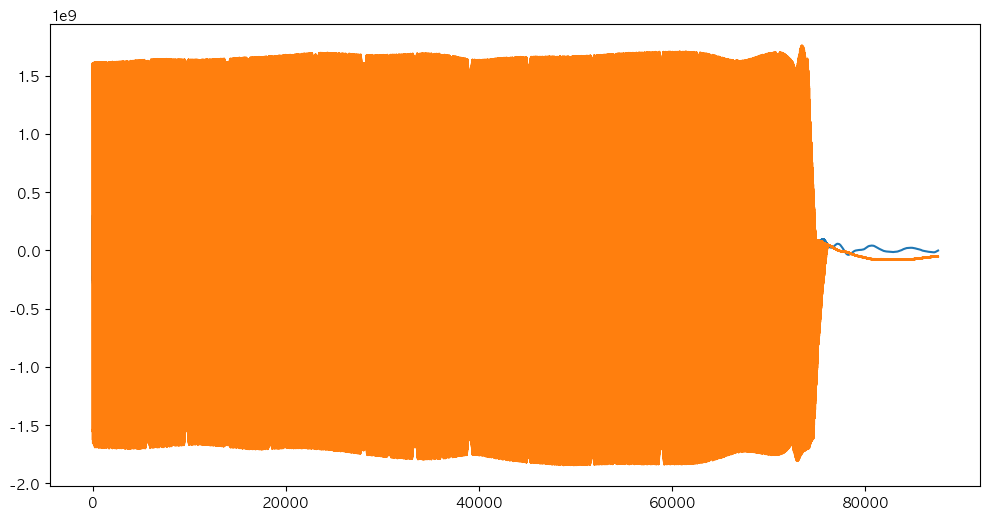

In [141]:
plt.figure(figsize=(12,6))
plt.plot(data)
plt.figure(figsize=(12,6))
plt.plot(data[:100000])
plt.figure(figsize=(12,6))
plt.plot(data[100000:200000])
plt.figure(figsize=(12,6))
plt.plot(data[200000:300000])
plt.figure(figsize=(12,6))
plt.plot(data[300000:301000])
plt.figure(figsize=(12,6))
plt.plot(data[500000:])

In [142]:
# librosa는 오디오 및 음악 분석에 특화된 라이브러리이므로 다양한 음악 분석 기능을 제공합니다.
# scipy.io.wavfile는 WAV 파일만을 지원하며, 단순한 오디오 파일 읽기/쓰기 기능만을 제공합니다.

# 샘플링 빈도 변환: librosa.load() 함수는 기본적으로 sr=22050으로 설정되어 있어,
# 이 샘플링 빈도로 리샘플링(resampling)을 수행합니다. 
# 따라서 원본 오디오의 샘플링 빈도와 다르게 출력될 수 있습니다. 
# 만약 원본 샘플링 빈도를 유지하려면 sr=None으로 설정하면 됩니다.

# 모노/스테레오: librosa.load()는 기본적으로 mono=True로 설정되어 있어 
# 스테레오 오디오를 모노로 변환합니다. 
# 이 때, 두 채널의 평균값을 취하여 모노 오디오를 생성합니다. 
# 반면 scipy.io.wavfile.read()는 원본 오디오를 그대로 읽어 들입니다. 
# 따라서, 스테레오 오디오의 경우 두 채널의 데이터를 모두 포함한 배열이 반환됩니다.

# 오디오 분석을 위한 모델을 학습 및 평가할 때, 샘플링 빈도를 변경하면 
# 원본 오디오의 특성이 바뀔 수 있기 때문에 실제 성능에 영향을 줄 수 있습니다. -> 변경 전/후 모델 비교필요

### data -> spectrogram_y -> stft

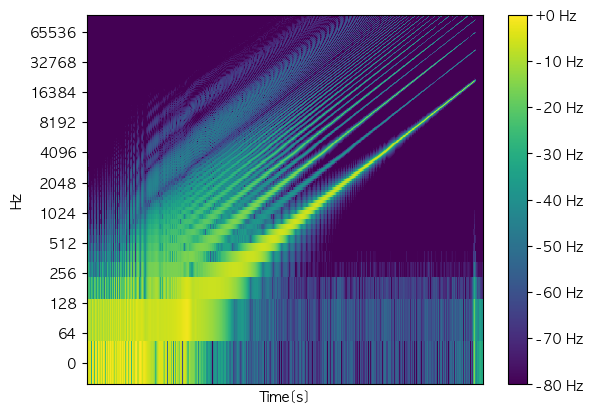

In [143]:
# sr 샘플링 빈도가 몇이든지 재생 시간은 같다. 같은 시간을 몇개로 쪼개냐 차이기 때문

# spectrogram_y, spectrogram_sr = librosa.load(abnorm_files[0], mono=True)
spectrogram_y, spectrogram_sr = librosa.load(abnorm_files[0], sr=sample_rate)

# 음원을 특정시간 주기로 쪼갠 후, -> 왜 쪼개?
# stft = librosa.stft(spectrogram_y[:spectrogram_sr])
# STFT 변환
stft = librosa.stft(spectrogram_y)
# 위 코드에서 librosa.amplitude_to_db는 STFT의 결과에서 얻은 복소수 값의 절대값 (즉, 진폭)을
# dB 스케일로 변환합니다. ref 파라미터는 데시벨 변환의 기준값으로 사용되며, 
# 예제에서는 STFT의 최대 진폭 값이 사용됩니다.
stft_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
# 변환된 주파수 대역의 스펙토그램을 보여준다
librosa.display.specshow(stft_db, sr=spectrogram_sr, cmap='viridis', y_axis='log')
plt.xlabel('Time[s]') # x축 제목
plt.ylabel('Hz') # y축 제목
# format은 지도와 같이 복잡한 내용을 표현할 수 있게 해주는 옵션
plt.colorbar(format="%+2.0f Hz")
# 시각화 차트 제목
# 차트를 그린다.
plt.show()

In [144]:
spectrogram_y.shape

(587536,)

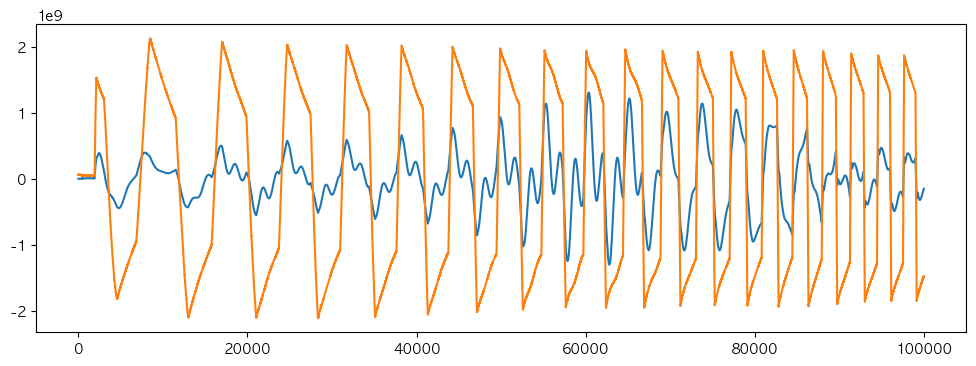

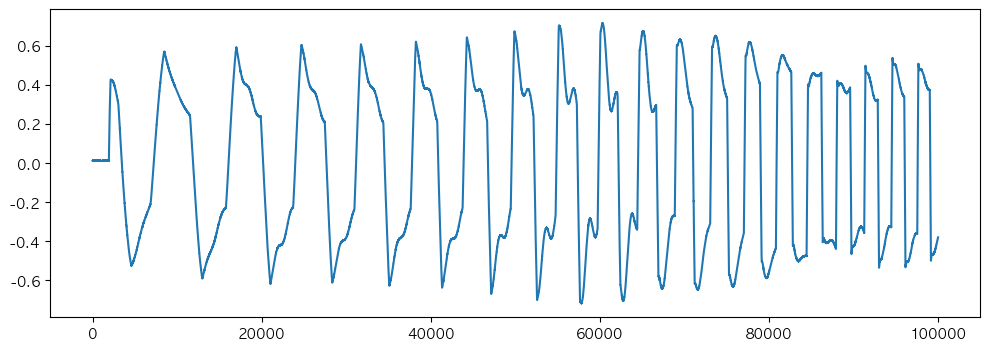

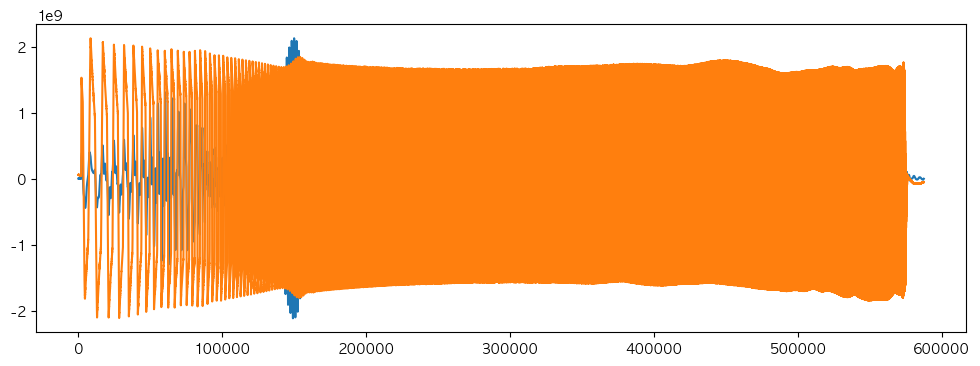

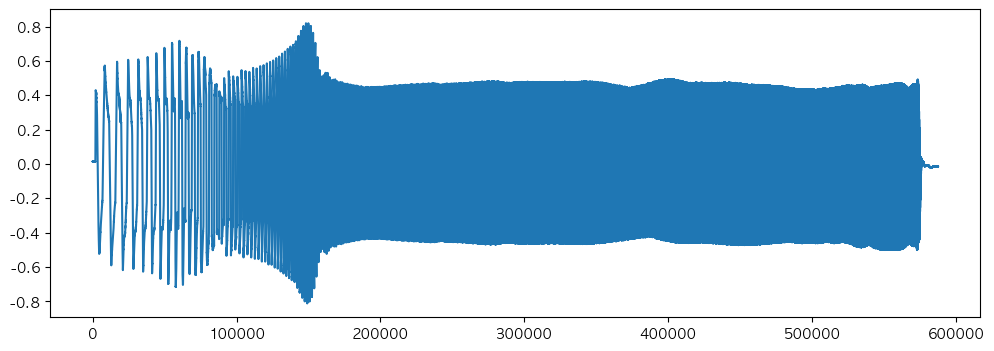

In [145]:
plt.figure(figsize=(12,4))
plt.plot(data[:100000])
plt.figure(figsize=(12,4))
plt.plot(spectrogram_y[:100000])
plt.figure(figsize=(12,4))
plt.plot(data)
plt.figure(figsize=(12,4))
plt.plot(spectrogram_y)

In [146]:
stft.shape

(1025, 1148)

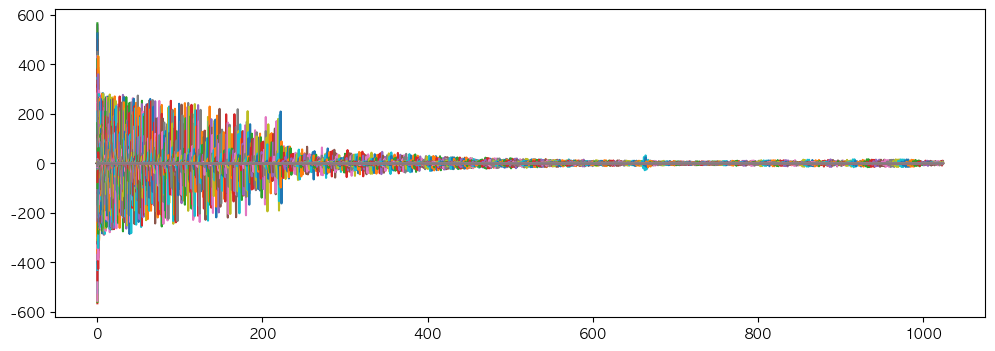

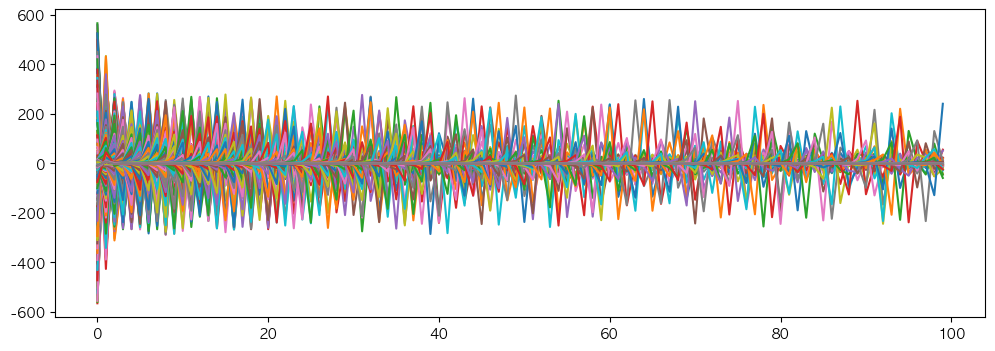

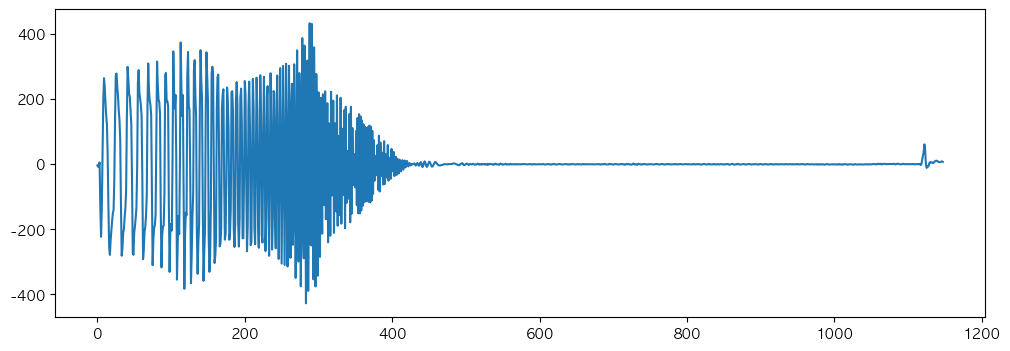

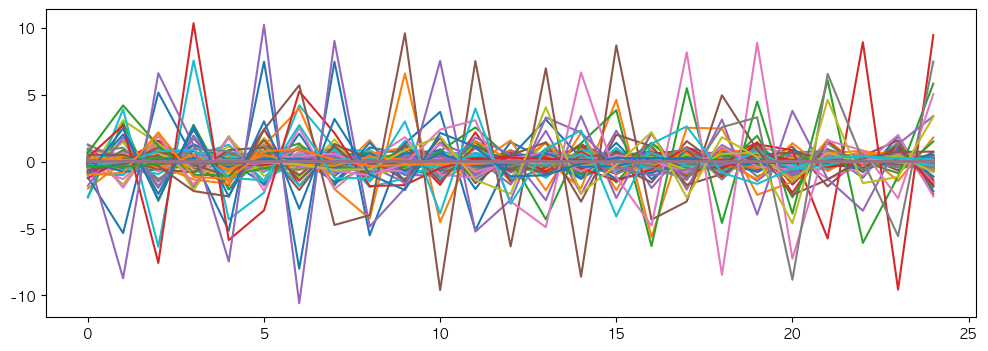

In [147]:
plt.figure(figsize=(12,4))
plt.plot(stft)
plt.figure(figsize=(12,4))
plt.plot(stft[:100])
plt.figure(figsize=(12,4))
plt.plot(stft[1])
plt.figure(figsize=(12,4))
plt.plot(stft[1000:])
plt.show()

(520,)
(1025, 2)
(1025, 2)


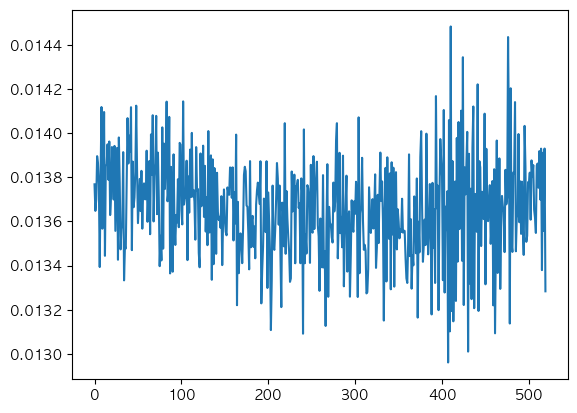

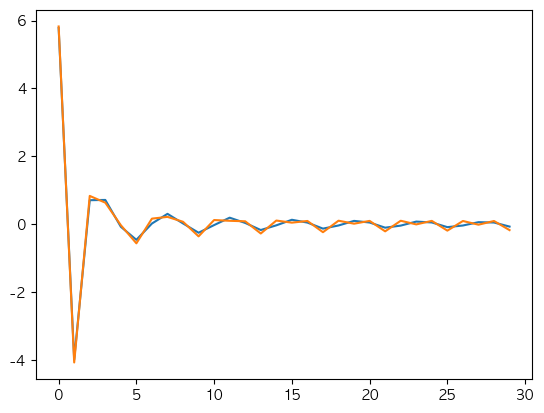

In [148]:
spec_array = spectrogram_y[:520]
# print(spec_array)
print(spec_array.shape)
plt.figure()
plt.plot(spec_array)

stft_array = librosa.stft(spec_array)
# print(stft_array)
print(stft_array.shape)
plt.figure()
plt.plot(stft_array[:30])

stft_db_array = librosa.amplitude_to_db(np.abs(stft_array), ref=np.max)
# print(stft_db_array)
print(stft_db_array.shape)

In [149]:
spectrogram_y[:spectrogram_sr]

len(spectrogram_y)/spectrogram_sr

3.0600833333333335

In [150]:
# sr 샘플링 빈도를 원본으로 유지해야함. 데이터 길이 차이가 큼
print(librosa.load(abnorm_files[1], sr=None))
print(librosa.load(abnorm_files[1]))
print(librosa.load(abnorm_files[1], sr=None)[0].shape)
print(librosa.load(abnorm_files[1])[0].shape)

(array([ 0.01215655,  0.01173204,  0.01188105, ..., -0.01391518,
       -0.01353985, -0.01350754], dtype=float32), 192000)
(array([ 0.006756  ,  0.01271205,  0.01123717, ..., -0.01399805,
       -0.0132611 , -0.0142131 ], dtype=float32), 22050)
(587536,)
(67475,)


In [152]:
y, sr = librosa.load(abnorm_files[0], sr =sample_rate)
y.shape
len(y) / sr
y

array([ 0.0137682 ,  0.01364785,  0.01370001, ..., -0.0120979 ,
       -0.0121336 , -0.01259929], dtype=float32)

In [153]:
# 4-2
# getMfcc() : 변환하고 싶은 파일과, sample_rate를 주면, mfcc를 자동으로 계산해주는 함수
# mfcc 
def getMfcc(file_name, sample_rate):
    # (전처리) 음향 데이터의 특징점 librosa 라이브러리로 특징점 추출
    y, sr = librosa.load(file_name, sr =sample_rate)
    # file_name : 해당 file 전체path,
    # sr=none 지정시 defualt sr 22050 값으로 반영 (본문은 original data 사용)
    print("Sample Rate: ",sr , " , Audio Shape:",y.shape)
    print("Audio Length: ", y.shape[0]/float(sr),'secs')
    
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=50)
    # y : 입력 Audio Source
    # sr : load 시 Sample Rate 값으로 반영 필요
    # n_mfcc : default 값은 20, 다양한 특징을 잡기 위해 range는 10~50로 임의 반영
    # mfcc로 특징점 추출된 shape 확인하기
    print("mfcc Shape: ",mfcc)
    print("mfcc Shape: ",mfcc.shape)
    print("mfcc Shape[0]: ",mfcc.shape[0]) # n_mfcc=50
    print("mfcc Shape[1]: ",mfcc.shape[1]) # .
    return mfcc

g_mfcc = getMfcc(abnorm_files[0], sample_rate)

Sample Rate:  192000  , Audio Shape: (587536,)
Audio Length:  3.0600833333333335 secs
mfcc Shape:  [[-421.9793    -451.2254    -479.42282   ... -488.08127   -484.1706
  -434.39313  ]
 [  85.45706     58.926376    25.640766  ...   14.666274    19.947659
    75.43064  ]
 [  39.276253    39.98502     22.060402  ...   14.518234    19.08965
    42.147877 ]
 ...
 [  -2.9853525   -3.781912    -4.8407345 ...   -5.555068    -4.142418
    -3.1252053]
 [  -3.2670317   -4.12461     -5.153948  ...   -5.7495284   -4.20475
    -3.707605 ]
 [  -3.7441723   -4.753266    -5.4302297 ...   -5.923916    -4.3411007
    -4.4254594]]
mfcc Shape:  (50, 1148)
mfcc Shape[0]:  50
mfcc Shape[1]:  1148


# data, (spectrogram_y -> stft, mfcc)

In [157]:
# 4-2 getMfcc() 함수는 필요 없다. 아래 한줄로 끝남
mfcc = librosa.feature.mfcc(y=spectrogram_y, sr=sample_rate, n_mfcc=50)
mfcc

array([[-421.9793   , -451.2254   , -479.42282  , ..., -488.08127  ,
        -484.1706   , -434.39313  ],
       [  85.45706  ,   58.926376 ,   25.640766 , ...,   14.666274 ,
          19.947659 ,   75.43064  ],
       [  39.276253 ,   39.98502  ,   22.060402 , ...,   14.518234 ,
          19.08965  ,   42.147877 ],
       ...,
       [  -2.9853525,   -3.781912 ,   -4.8407345, ...,   -5.555068 ,
          -4.142418 ,   -3.1252053],
       [  -3.2670317,   -4.12461  ,   -5.153948 , ...,   -5.7495284,
          -4.20475  ,   -3.707605 ],
       [  -3.7441723,   -4.753266 ,   -5.4302297, ...,   -5.923916 ,
          -4.3411007,   -4.4254594]], dtype=float32)

In [159]:
mfcc.shape

(50, 1148)

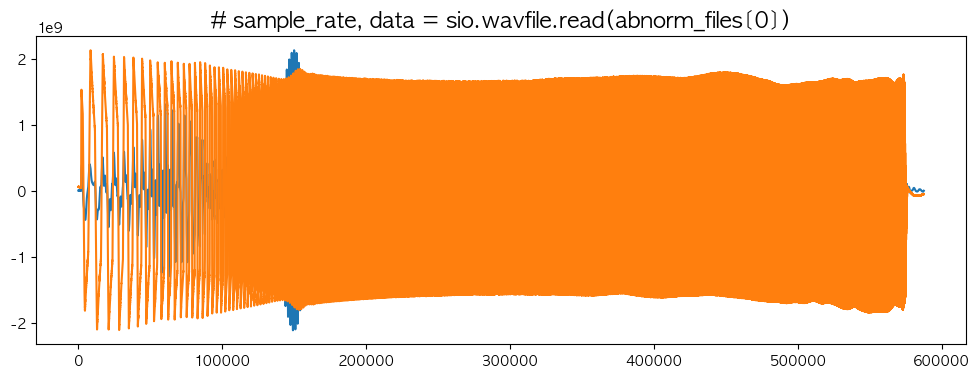

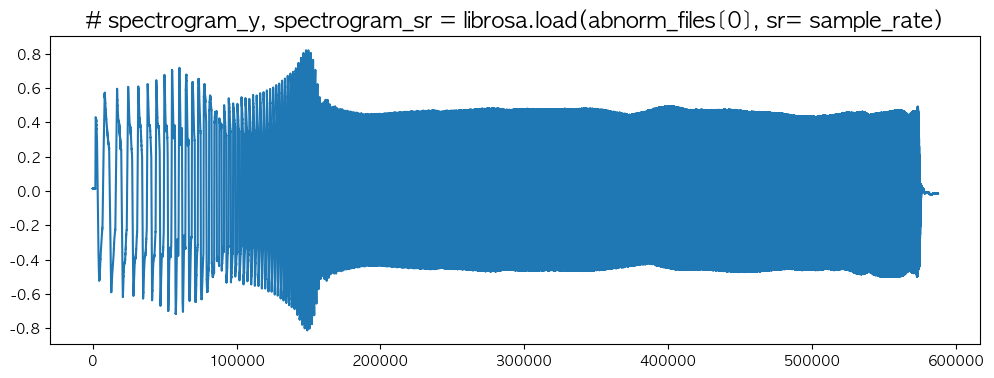

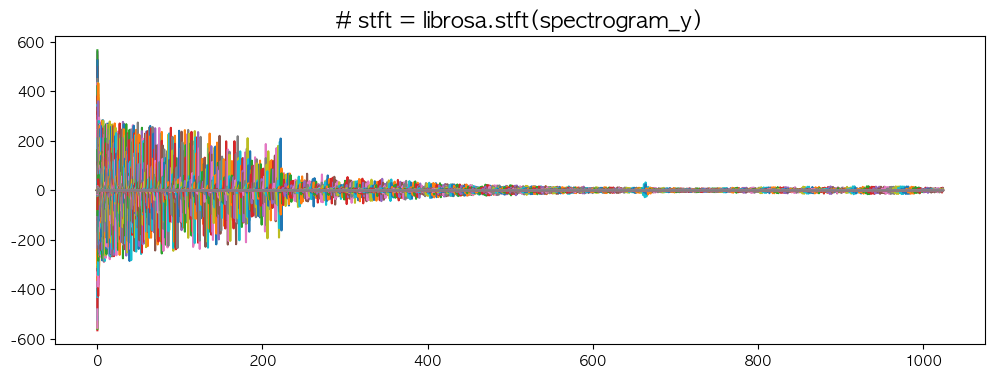

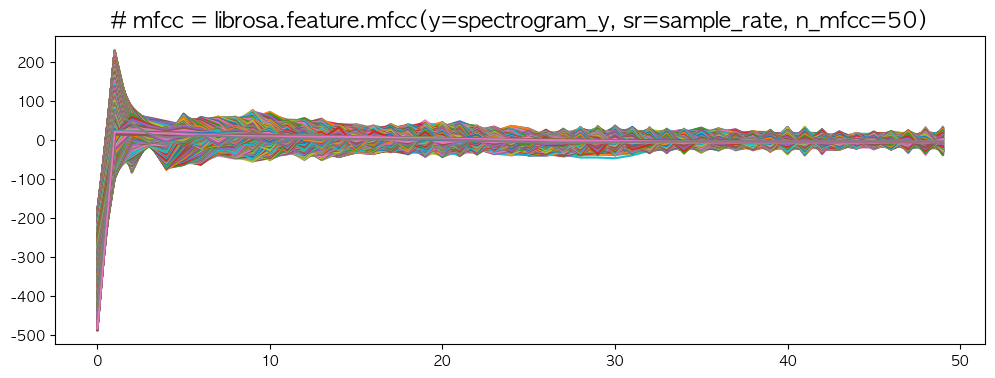

In [166]:
# sample_rate, data = sio.wavfile.read(abnorm_files[0])
# spectrogram_y, spectrogram_sr = librosa.load(abnorm_files[0], sr= sample_rate)
# stft = librosa.stft(spectrogram_y)
# mfcc = librosa.feature.mfcc(y=spectrogram_y, sr=sample_rate, n_mfcc=50)


plt.figure(figsize=(12,4))
plt.title('# sample_rate, data = sio.wavfile.read(abnorm_files[0])', fontsize=16)
plt.plot(data)

plt.figure(figsize=(12,4))
plt.title('# spectrogram_y, spectrogram_sr = librosa.load(abnorm_files[0], sr= sample_rate)', fontsize=16)
plt.plot(spectrogram_y)

plt.figure(figsize=(12,4))
plt.title('# stft = librosa.stft(spectrogram_y)', fontsize=16)
plt.plot(stft)

plt.figure(figsize=(12,4))
plt.title('# mfcc = librosa.feature.mfcc(y=spectrogram_y, sr=sample_rate, n_mfcc=50)', fontsize=16)
plt.plot(mfcc)

plt.show()

In [155]:
# 4-3
# 라벨링 할 변수 생성
x_data =[]
y_data =[]
# 라벨링 할 함수 만들기
def feature_labeling(file_name, mfcc):
    buffer=[]
    print("*", file_name)
    for element in mfcc:
    # mfcc가 추출한 특징의 평균값 사용
    buffer.append(np.mean(element))
    # train할 데이터 Set 으로 만들기
    x_data.append(buffer)
    # train할 Labeling Set 으로 만들기
    if 'normal' in file_name:
    y_data.append(0) # 양품
    elif 'abnorm' in file_name:
    y_data.append(1) # 불량
    
f_labeling = feature_labeling(file_name, g_mfcc)

IndentationError: expected an indented block (2257506255.py, line 11)

In [ ]:
# 4-4
# (수행) 전체 파일 특징점 추출 및 라벨링 데이터 취득
for i ,file_name in enumerate(abnorm_files):
    # 위에서 만든 getMfcc 함수 호출
    g_mfcc = getMfcc(file_name, sample_rate)
    #feature_labeling 함수 호출
    feature_labeling(file_name, g_mfcc)

Sample Rate:  192000  , Audio Shape: (587536,)
Audio Length:  3.0600833333333335 secs
mfcc Shape:  [[-421.9793    -451.2254    -479.42282   ... -488.08127   -484.1706
  -434.39313  ]
 [  85.45706     58.926376    25.640766  ...   14.666274    19.947659
    75.43064  ]
 [  39.276253    39.98502     22.060402  ...   14.518234    19.08965
    42.147877 ]
 ...
 [  -2.9853525   -3.781912    -4.8407345 ...   -5.555068    -4.142418
    -3.1252053]
 [  -3.2670317   -4.12461     -5.153948  ...   -5.7495284   -4.20475
    -3.707605 ]
 [  -3.7441723   -4.753266    -5.4302297 ...   -5.923916    -4.3411007
    -4.4254594]]


NameError: name 'feature_labeling' is not defined

In [ ]:
# 기본 원본 데이터를 plt.plot으로 그려보고 전처리 하면서 plt.plot 그래프가 어떻게 바뀌는지 보기
# LSMT, 트랜스포머
# 머신러닝, 딥러닝으로도 해보기 -> CNN 커널수 늘려서